##About Dataset

**Content**
<p>This dataset includes 23486 rows and 10 feature variables. Each row corresponds to a customer review, and includes the variables:</p>

  * Clothing ID: Integer Categorical variable that refers to the specific piece being reviewed.
  * Age: Positive Integer variable of the reviewers age.
  * Title: String variable for the title of the review.
  * Review Text: String variable for the review body.
  * Rating: Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.
  * Recommended IND: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.
  * Positive Feedback Count: Positive Integer documenting the number of other customers who found this review positive.
  * Division Name: Categorical name of the product high level division.
  * Department Name: Categorical name of the product department name.
  * Class Name: Categorical name of the product class name.

##Import Libraries and Dataset

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# dataframe
import pandas as pd
import numpy as np

# data visualization
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import plot
import missingno as msno
from wordcloud import WordCloud
from PIL import Image

# request
import requests

# tensorflow, for NN
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, GlobalMaxPooling1D, Dropout

# sentiment analysis
from textblob import *
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# NLTK, for NLP
import nltk
import string
import re
from nltk.util import ngrams
from nltk.corpus import stopwords
from sklearn.feature_extraction import _stop_words
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# sklearn, for preprocessing & scoring
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 KB 3.2 MB/s eta 0:00:00


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/IS765_Text_Analytics/Womens Clothing E-Commerce Reviews.csv")
df.head()

Unnamed: 0  Clothing ID  Age                    Title  \
0           0          767   33                      NaN   
1           1         1080   34                      NaN   
2           2         1077   60  Some major design flaws   
3           3         1049   50         My favorite buy!   
4           4          847   47         Flattering shirt   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  
0                        0       Initmates        Intimate  Intimates  
1                        4         General         Dresses    Dresses  
2                        0         General         Dresses    Dresses  
3                        0  General Petite         Bottoms      Pants  
4                        6         General            Tops    Blouses

In [ ]:
#Required variables headers are prepared for modeling
df = df.rename(columns={'Review Text': 'Review_Text', 'Recommended IND': 'Recommended_IND', 'Positive Feedback Count': 'Positive_Feedback_Count', 'Division Name':'Division_Name', 'Department Name':'Department_Name', 'Class Name':'Class_Name'})
df = df.iloc[:, 2:11]
df.head()

Age                    Title  \
0   33                      NaN   
1   34                      NaN   
2   60  Some major design flaws   
3   50         My favorite buy!   
4   47         Flattering shirt   

                                         Review_Text  Rating  Recommended_IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   

   Positive_Feedback_Count   Division_Name Department_Name Class_Name  
0                        0       Initmates        Intimate  Intimates  
1                        4         General         Dresses    Dresses  
2                        0         General         Dresses    Dresses  
3                        0  General Petite         Bottoms      Pants  
4                        6         General            Tops    Blouses

In [ ]:
df.shape

(23486, 9)

In [ ]:
df.isnull().sum()

Age                           0
Title                      3810
Review_Text                 845
Rating                        0
Recommended_IND               0
Positive_Feedback_Count       0
Division_Name                14
Department_Name              14
Class_Name                   14
dtype: int64

In [ ]:
df.duplicated().sum()

232

In [ ]:
df = df.dropna()

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.shape

(19661, 9)

In [ ]:
df.head()

Age                    Title  \
2   60  Some major design flaws   
3   50         My favorite buy!   
4   47         Flattering shirt   
5   49  Not for the very petite   
6   39     Cagrcoal shimmer fun   

                                         Review_Text  Rating  Recommended_IND  \
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   
5  I love tracy reese dresses, but this one is no...       2                0   
6  I aded this in my basket at hte last mintue to...       5                1   

   Positive_Feedback_Count   Division_Name Department_Name Class_Name  
2                        0         General         Dresses    Dresses  
3                        0  General Petite         Bottoms      Pants  
4                        6         General            Tops    Blouses  
5                        4         General         Dresses    Dresses  
6                        1  General Petite            Tops      Knits

In [ ]:
df['Text'] = df['Title'].astype(str) + ' ' + df['Review_Text'].astype(str)
df = df.drop(labels=['Title', 'Review_Text'] , axis=1)
df.head()

Age  Rating  Recommended_IND  Positive_Feedback_Count   Division_Name  \
2   60       3                0                        0         General   
3   50       5                1                        0  General Petite   
4   47       5                1                        6         General   
5   49       2                0                        4         General   
6   39       5                1                        1  General Petite   

  Department_Name Class_Name  \
2         Dresses    Dresses   
3         Bottoms      Pants   
4            Tops    Blouses   
5         Dresses    Dresses   
6            Tops      Knits   

                                                Text  
2  Some major design flaws I had such high hopes ...  
3  My favorite buy! I love, love, love this jumps...  
4  Flattering shirt This shirt is very flattering...  
5  Not for the very petite I love tracy reese dre...  
6  Cagrcoal shimmer fun I aded this in my basket ...

In [ ]:
describe = df.describe()
describe.T.style.background_gradient(low=0.2, high=0.5, cmap = 'Greys')

##Age

In [ ]:
hist_data = [df['Age']]
group_labels = ['Age Distribution']

fig1 = ff.create_distplot(hist_data, group_labels, show_hist = False, colors=['#045FB4'])
fig1.update_layout(title = 'Age Distribution', template = 'simple_white') 
fig1.update_layout(font=dict(size=17, family='Franklin Gothic'))
fig1.update_layout(width=1000)
fig1.update_layout(showlegend=False)

fig1.show()

In [ ]:
age = df.Age.value_counts().sort_index()
age_range = [10*i for i in range(1,10)]
store = []
age_df = pd.DataFrame(columns = ['count','age'])
for idx, count in enumerate(age_range):
    store.append([age[num] for idx, num in enumerate(age.index) if num >= count and num<= count+9])
age = [str(num) +' to '+ str(num+9) for num in age_range]
age_df['count'] = [sum(num) for num in store]
age_df['age'] = age

In [ ]:
fig2 = px.bar(x = age_df['age'], 
              y = age_df['count'], 
              text = age_df['count'], color = age_df['age'],
              color_discrete_sequence = px.colors.sequential.Teal,
              template = 'simple_white',
              title = 'Age Bar Plot')

fig2.update_traces(width=0.7)

# marker line
idx = [num for num in range(2,5)]
for index in idx:
    fig2.data[index].marker.line.width = 2
    fig2.data[index].marker.line.color = 'black'

fig2.update_layout(xaxis_title='Age Range', yaxis_title='Count', font=dict(size=17, family='Franklin Gothic'))
fig2.update_layout(width=1000)
fig2.update_layout(showlegend=False)

fig2.show()

##Positive Feedback Count

In [ ]:
hist_data = [df['Positive_Feedback_Count']]
group_labels = ['Positive Feedback Count Distribution']

fig3 = ff.create_distplot(hist_data, group_labels, show_hist = False, colors=['#8A2908'])
fig3.update_layout(title = 'Positive Feedback Count Distribution', template = 'simple_white') 
fig3.update_layout(font=dict(size=17, family='Franklin Gothic'))
fig3.update_layout(width=1000)
fig3.update_layout(showlegend=False)

fig3.show()

In [ ]:
feedback = df.Positive_Feedback_Count.value_counts().sort_index()
feedback_count_range = [20*i for i in range(0,7)]
store = []
feedback_df = pd.DataFrame(columns = ['count','positive_feedback'])
for idx, count in enumerate(feedback_count_range):
    store.append([feedback[num] for idx, num in enumerate(feedback.index) if num >= count and num<= count+19])
pos_feedback = [str(num) +' to '+ str(num+19) for num in feedback_count_range]
feedback_df['count'] = [sum(num) for num in store]
feedback_df['positive_feedback'] = pos_feedback

In [ ]:
fig4 = px.bar(x = feedback_df['positive_feedback'], 
              y = feedback_df['count'], 
              text = feedback_df['count'], color = feedback_df['positive_feedback'],
              color_discrete_sequence = px.colors.sequential.Brwnyl,
              template = 'simple_white',
              title = 'Positive Feedback Count Bar Plot')

fig4.update_traces(width=0.7)

# marker line
idx = [num for num in range(2,5)]
for index in idx:
    fig4.data[index].marker.line.width = 2
    fig4.data[index].marker.line.color = 'black'

fig4.update_layout(xaxis_title='Positive Feedback Range', yaxis_title='Count', font=dict(size=17, family='Franklin Gothic'))
fig4.update_layout(width=1000)
fig4.update_layout(showlegend=False)

fig4.show()

##Categorical Columns

In [ ]:
fig5 = px.histogram(df, y='Class_Name', orientation='h', color='Class_Name',
                    color_discrete_sequence= ['#EED1CC'])

fig5.update_yaxes(type='category')
fig5.update_layout(title = 'Distribution of the number of reviews by Class', template = 'simple_white') 
fig5.update_layout(xaxis_title='Count', yaxis_title='Class Name', font=dict(size=17, family='Franklin Gothic'))
fig5.update_layout(yaxis={'categoryorder':'total ascending'})
fig5.update_layout(height=600, width=1000)
fig5.update_layout(showlegend=False)

fig5.show()

In [ ]:
fig6 = px.histogram(df, y='Division_Name', orientation='h', color='Division_Name',
                    color_discrete_sequence= ['#B3CAD8'])

fig6.update_yaxes(type='category')
fig6.update_layout(title = 'Distribution of the number of reviews by Division', template = 'simple_white') 
fig6.update_layout(xaxis_title='Count', yaxis_title='Division Name', font=dict(size=17, family='Franklin Gothic'))
fig6.update_layout(yaxis={'categoryorder':'total ascending'})
fig6.update_layout(height=500, width=1000)
fig6.update_layout(showlegend=False)

fig6.show()

In [ ]:
fig7 = px.histogram(df, y='Department_Name', orientation='h', color='Department_Name',
                    color_discrete_sequence= ['#DEE1CB'])

fig7.update_yaxes(type='category')
fig7.update_layout(title = 'Distribution of the number of reviews by Department', template = 'simple_white') 
fig7.update_layout(xaxis_title='Count', yaxis_title='Department Name', font=dict(size=17, family='Franklin Gothic'))
fig7.update_layout(yaxis={'categoryorder':'total ascending'})
fig7.update_layout(height=500, width=1000)
fig7.update_layout(showlegend=False)

fig7.show()

In [ ]:
# treemap
fig9 = px.treemap(df, path=['Department_Name','Class_Name'], title='Tree Map: Department & Class Name', color_discrete_sequence=px.colors.sequential.GnBu, width=1000, height=600)

fig9.update_traces(textinfo='label+value', textfont_size=15, marker=dict(line=dict(color='white', width=0.2)))
fig9.update_layout(font = dict(size=17, family = 'Franklin Gothic'))
fig9.show()

##Rating & Recommended IND

In [ ]:
rating = df['Rating'].value_counts()
recommended = df['Recommended_IND'].value_counts()

# Create subplots: use 'domain' type for Pie subplot
fig8 = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])

fig8.add_trace(go.Pie(labels=rating.index, values=rating.values, marker=dict(colors=['#DDCFC2', '#D6C3B4', '#BFD1C4', '#B3CAD8', '#E0DFE4']), title='Rating', titlefont=dict(size=16)),1, 1)
fig8.add_trace(go.Pie(labels=recommended.index, values=recommended.values, marker=dict(colors=['#E3D0CC', '#CCD2CC']), title='Recommended IND', titlefont=dict(size=16)),1, 2)

# Use 'hole' to create a donut-like pie chart
fig8.update_traces(hole=0.4, hoverinfo='label+percent+value', textfont_size=14, marker=dict(line=dict(color='white', width=1)))
fig8.update_traces(textinfo='label+percent+value', textfont_size=14)
fig8.update_layout(font=dict(size=15, family='Franklin Gothic'))
fig8.update_layout(showlegend=False)

fig8.show()

##Preprocessing

In [ ]:
stopwords = nltk.corpus.stopwords.words('english')
wn = WordNetLemmatizer()

def preprocess_text(text):
    # Lowercase the text
    text = text.lower()
    
    # Remove links
    text = re.sub('@[^\s]+', '', text)
    text = re.sub('http[^\s]+', '', text)

    # Remove punctuation
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    
    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Tokenize text
    tokens = text.split()

    # Remove stopwords, lemmatize and drop words length < 2
    text = [wn.lemmatize(word) for word in tokens if word not in stopwords and len(word) > 2]
    
    return text

In [ ]:
df['Text'] = df['Text'].map(lambda x: preprocess_text(x))
df.head()

Age  Rating  Recommended_IND  Positive_Feedback_Count   Division_Name  \
2   60       3                0                        0         General   
3   50       5                1                        0  General Petite   
4   47       5                1                        6         General   
5   49       2                0                        4         General   
6   39       5                1                        1  General Petite   

  Department_Name Class_Name  \
2         Dresses    Dresses   
3         Bottoms      Pants   
4            Tops    Blouses   
5         Dresses    Dresses   
6            Tops      Knits   

                                                Text  
2  [major, design, flaw, high, hope, dress, reall...  
3  [favorite, buy, love, love, love, jumpsuit, fu...  
4  [flattering, shirt, shirt, flattering, due, ad...  
5  [petite, love, tracy, reese, dress, one, petit...  
6  [cagrcoal, shimmer, fun, aded, basket, hte, la...

##Word Cloud

In [ ]:
# Get picture
url = 'https://m.media-amazon.com/images/W/IMAGERENDERING_521856-T1/images/I/71p9m51QtUL._UL1500_.jpg'
mask = np.array(Image.open(requests.get(url, stream=True).raw))

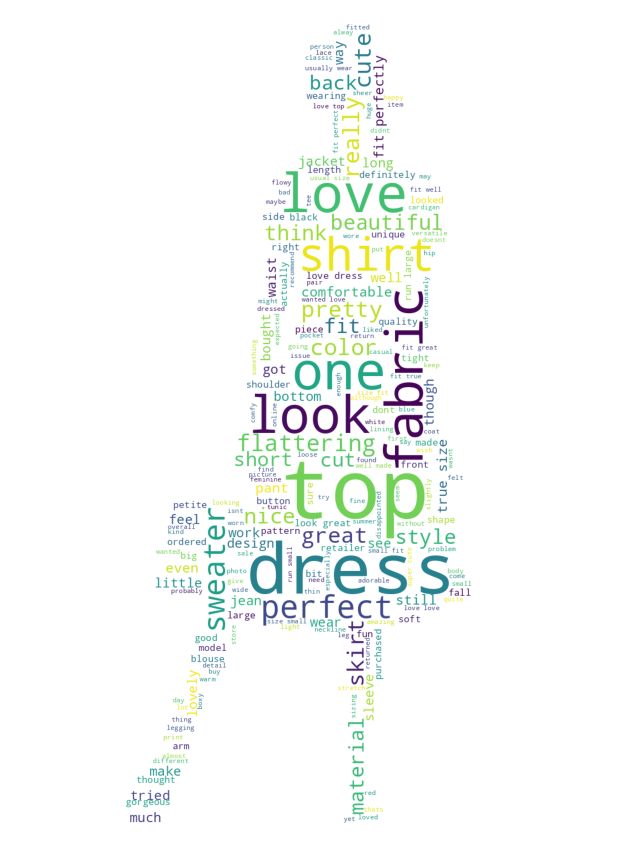

In [ ]:
text = ' '
for x in df['Text']: 
    text+=' '.join(x)+' '

wc = WordCloud(width=1000, height=800, background_color='white', max_words=1000, mask=mask, min_font_size=12, random_state=1).generate(text)
plt.figure(figsize=(8,12))
plt.imshow(wc)
plt.axis('off')
plt.show()

##Sentiment Analysis

* Polarity is the output that lies between [-1,1], where -1 refers to negative sentiment and +1 refers to positive sentiment.
* Subjectivity is the output that lies within [0,1] and refers to personal opinions and judgments.

In [ ]:
df['Polarity'] = df['Text'].map(lambda x: TextBlob(' '.join(x)).sentiment.polarity)
df['Subjectivity'] = df['Text'].map(lambda x: TextBlob(' '.join(x)).sentiment.subjectivity)

In [ ]:
df.head()

Age  Rating  Recommended_IND  Positive_Feedback_Count   Division_Name  \
2   60       3                0                        0         General   
3   50       5                1                        0  General Petite   
4   47       5                1                        6         General   
5   49       2                0                        4         General   
6   39       5                1                        1  General Petite   

  Department_Name Class_Name  \
2         Dresses    Dresses   
3         Bottoms      Pants   
4            Tops    Blouses   
5         Dresses    Dresses   
6            Tops      Knits   

                                                Text  Polarity  Subjectivity  
2  [major, design, flaw, high, hope, dress, reall...  0.062413      0.345866  
3  [favorite, buy, love, love, love, jumpsuit, fu...  0.500000      0.678571  
4  [flattering, shirt, shirt, flattering, due, ad...  0.458333      0.658333  
5  [petite, love, tracy, reese, dress, one, petit...  0.150000      0.542857  
6  [cagrcoal, shimmer, fun, aded, basket, hte, la...  0.120500      0.369333

In [ ]:
fig9 = go.Figure()
fig9.add_trace(go.Histogram(x=df['Polarity'], name='Polarity', marker_color='#EBC2C0'))
fig9.add_trace(go.Histogram(x=df['Subjectivity'], name='Subjectivity', marker_color='#B3CAD8'))

# Overlay both histograms
fig9.update_layout(barmode='overlay')
fig9.update_layout(title = 'Distribution of Polarity and Subjectivity', template='simple_white') 
fig9.update_layout(xaxis_title='Range', yaxis_title='Count', font=dict(size=17, family='Franklin Gothic'))
fig9.update_layout(height=500, width=1000)
fig9.update_layout(legend=dict(yanchor='top', y=0.99, xanchor='left', x=0.01))

# Reduce opacity to see both histograms
fig9.update_traces(opacity=0.8)
fig9.update_yaxes(showgrid=False)

fig9.show()

<p>The VADER library returns 4 values such as:</p>

* pos: The probability of the sentiment to be positive
* neu: The probability of the sentiment to be neutral
* neg: The probability of the sentiment to be negative
* compound: The normalized compound score which calculates the sum of all lexicon ratings and takes values from -1 to 1

<p>Typical threshold values are the following:</p>

* positive: compound score > 0.35
* neutral: compound score between -0.05 and 0.35
* negative: compound score < -0.05

In [ ]:
analyzer = SentimentIntensityAnalyzer()

In [ ]:
df['vader_compound'] = df['Text'].map(lambda x: analyzer.polarity_scores(' '.join(x))['compound'])
df['vader_negative'] = df['Text'].map(lambda x: analyzer.polarity_scores(' '.join(x))['neg'])
df['vader_neutral'] = df['Text'].map(lambda x: analyzer.polarity_scores(' '.join(x))['neu'])
df['vader_positive'] = df['Text'].map(lambda x: analyzer.polarity_scores(' '.join(x))['pos'])

In [ ]:
df.head()

Age  Rating  Recommended_IND  Positive_Feedback_Count   Division_Name  \
2   60       3                0                        0         General   
3   50       5                1                        0  General Petite   
4   47       5                1                        6         General   
5   49       2                0                        4         General   
6   39       5                1                        1  General Petite   

  Department_Name Class_Name  \
2         Dresses    Dresses   
3         Bottoms      Pants   
4            Tops    Blouses   
5         Dresses    Dresses   
6            Tops      Knits   

                                                Text  Polarity  Subjectivity  \
2  [major, design, flaw, high, hope, dress, reall...  0.062413      0.345866   
3  [favorite, buy, love, love, love, jumpsuit, fu...  0.500000      0.678571   
4  [flattering, shirt, shirt, flattering, due, ad...  0.458333      0.658333   
5  [petite, love, tracy, reese, dress, one, petit...  0.150000      0.542857   
6  [cagrcoal, shimmer, fun, aded, basket, hte, la...  0.120500      0.369333   

   vader_compound  vader_negative  vader_neutral  vader_positive  
2          0.8807           0.038          0.734           0.229  
3          0.9587           0.159          0.190           0.650  
4          0.9274           0.000          0.471           0.529  
5          0.9153           0.000          0.738           0.262  
6          0.8173           0.044          0.784           0.172

In [ ]:
df.describe()

Age        Rating  Recommended_IND  Positive_Feedback_Count  \
count  19661.000000  19661.000000     19661.000000             19661.000000   
mean      43.261686      4.183104         0.818168                 2.652612   
std       12.257816      1.112237         0.385716                 5.834402   
min       18.000000      1.000000         0.000000                 0.000000   
25%       34.000000      4.000000         1.000000                 0.000000   
50%       41.000000      5.000000         1.000000                 1.000000   
75%       52.000000      5.000000         1.000000                 3.000000   
max       99.000000      5.000000         1.000000               122.000000   

           Polarity  Subjectivity  vader_compound  vader_negative  \
count  19661.000000  19661.000000    19661.000000    19661.000000   
mean       0.270289      0.578388        0.832365        0.052172   
std        0.168218      0.120316        0.276068        0.065607   
min       -0.916667      0.000000       -0.940300        0.000000   
25%        0.166250      0.500000        0.844200        0.000000   
50%        0.268056      0.575175        0.931300        0.036000   
75%        0.375000      0.650000        0.964300        0.084000   
max        1.000000      1.000000        0.996100        0.704000   

       vader_neutral  vader_positive  
count   19661.000000    19661.000000  
mean        0.540772        0.407050  
std         0.139274        0.155089  
min         0.000000        0.000000  
25%         0.453000        0.302000  
50%         0.546000        0.398000  
75%         0.633000        0.507000  
max         1.000000        1.000000

In [ ]:
fig10 = go.Figure()
fig10.add_trace(go.Histogram(x=df['vader_negative'], name='Negative', marker_color='#7A848D'))
fig10.add_trace(go.Histogram(x=df['vader_neutral'], name='Neutral', marker_color='#D4C3AA'))
fig10.add_trace(go.Histogram(x=df['vader_positive'], name='Positive', marker_color='#CC5F5A'))

# Overlay both histograms
fig10.update_layout(barmode='overlay')
fig10.update_layout(title = 'Distribution of VADER Sentiment Analysis', template = 'simple_white') 
fig10.update_layout(xaxis_title='Range', yaxis_title='Count', font=dict(size=17, family='Franklin Gothic'))
fig10.update_layout(height=500, width=1000)
fig10.update_layout(legend=dict(yanchor='top', y=0.99, xanchor='left', x=0.01))

# Reduce opacity to see both histograms
fig10.update_traces(opacity=0.8)
fig10.update_yaxes(showgrid=False)

fig10.show()

In [ ]:
fig11 = go.Figure()
fig11.add_trace(go.Histogram(x=df['vader_compound'], name='Compound', marker_color='#597A69'))

fig11.update_layout(title = 'Distribution of VADER Compound', template = 'simple_white') 
fig11.update_layout(xaxis_title='Range', yaxis_title='Count', font=dict(size=17, family='Franklin Gothic'))
fig11.update_layout(height=500, width=800)
fig11.update_layout(legend=dict(yanchor='top', y=0.99, xanchor='left', x=0.01))

# Reduce opacity
fig11.update_traces(opacity=0.8)
fig11.update_yaxes(showgrid=False)

fig11.show()

## Topic Modeling (LDA)

In [ ]:
df.head()

Age  Rating  Recommended_IND  Positive_Feedback_Count   Division_Name  \
2   60       3                0                        0         General   
3   50       5                1                        0  General Petite   
4   47       5                1                        6         General   
5   49       2                0                        4         General   
6   39       5                1                        1  General Petite   

  Department_Name Class_Name  \
2         Dresses    Dresses   
3         Bottoms      Pants   
4            Tops    Blouses   
5         Dresses    Dresses   
6            Tops      Knits   

                                                Text  Polarity  Subjectivity  \
2  [major, design, flaw, high, hope, dress, reall...  0.062413      0.345866   
3  [favorite, buy, love, love, love, jumpsuit, fu...  0.500000      0.678571   
4  [flattering, shirt, shirt, flattering, due, ad...  0.458333      0.658333   
5  [petite, love, tracy, reese, dress, one, petit...  0.150000      0.542857   
6  [cagrcoal, shimmer, fun, aded, basket, hte, la...  0.120500      0.369333   

   vader_compound  vader_negative  vader_neutral  vader_positive  
2          0.8807           0.038          0.734           0.229  
3          0.9587           0.159          0.190           0.650  
4          0.9274           0.000          0.471           0.529  
5          0.9153           0.000          0.738           0.262  
6          0.8173           0.044          0.784           0.172

In [ ]:
import gensim
from gensim.utils import simple_preprocess

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

In [ ]:
data = df['Text'].values.tolist()

In [ ]:
data_words = list(sent_to_words(data))

In [ ]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]


In [ ]:
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=5, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

In [ ]:
for idx in range(5):
    print("Topic #%s:" % idx, lda_model.print_topic(idx, 10))
print("=" * 200)

Topic #0: 0.027*"like" + 0.023*"look" + 0.021*"top" + 0.019*"fabric" + 0.014*"would" + 0.012*"really" + 0.012*"back" + 0.010*"material" + 0.010*"waist" + 0.010*"fit"
Topic #1: 0.037*"price" + 0.021*"sale" + 0.016*"worth" + 0.014*"coat" + 0.013*"first" + 0.013*"wash" + 0.013*"quality" + 0.010*"time" + 0.009*"button" + 0.009*"one"
Topic #2: 0.037*"love" + 0.033*"great" + 0.020*"color" + 0.020*"sweater" + 0.018*"fit" + 0.018*"soft" + 0.016*"wear" + 0.016*"jean" + 0.015*"perfect" + 0.015*"look"
Topic #3: 0.091*"dress" + 0.023*"beautiful" + 0.023*"love" + 0.015*"color" + 0.015*"wear" + 0.012*"perfect" + 0.011*"fit" + 0.011*"gorgeous" + 0.010*"flattering" + 0.008*"one"
Topic #4: 0.071*"size" + 0.042*"small" + 0.029*"fit" + 0.026*"large" + 0.026*"ordered" + 0.026*"run" + 0.023*"petite" + 0.018*"medium" + 0.017*"top" + 0.014*"usually"


**Coherence Score** A model with higher coherence score is preferred.
<br>
**Perplexity** A model with lower perplexity score is preferred.

In [ ]:
from gensim.models import CoherenceModel

# Compute Coherence Score & Perplexity
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)
print('Perplexity: ', lda_model.log_perplexity(corpus))

Coherence Score:  0.3942576815900981
Perplexity:  -7.0614772972334725


In [ ]:
# supporting function
def compute_coherence_values(corpus, dictionary, k, a, b):
    
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=k, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=a,
                                           eta=b)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

In [ ]:
import tqdm

grid = {}
grid['Validation_Set'] = {}

# Topics range: Number of Topics (K)
min_topics = 2
max_topics = 11
step_size = 1
topics_range = range(min_topics, max_topics, step_size)

# Alpha parameter: Dirichlet hyperparameter alpha: Document-Topic Density
alpha = [0.01]
'''
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')
'''

# Beta parameter: Dirichlet hyperparameter beta: Word-Topic Density
beta = [0.1]
'''
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')
'''

# Validation sets
num_of_docs = len(corpus)
corpus_sets = [gensim.utils.ClippedCorpus(corpus, int(num_of_docs*0.75)), 
               corpus]

corpus_title = ['75% Corpus', '100% Corpus']

model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }

# Can take a long time to run
if 1 == 1:
    pbar = tqdm.tqdm(total=(len(beta)*len(alpha)*len(topics_range)*len(corpus_title)))
    
    # iterate through validation corpuses
    for i in range(len(corpus_sets)):
        # iterate through number of topics
        for k in topics_range:
            # iterate through alpha values
            for a in alpha:
                # iterare through beta values
                for b in beta:
                    # get the coherence score for the given parameters
                    cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=id2word, 
                                                  k=k, a=a, b=b)
                    # Save the model results
                    model_results['Validation_Set'].append(corpus_title[i])
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)
                    
                    pbar.update(1)
    pbar.close()

100%|██████████| 18/18 [30:27<00:00, 101.52s/it]


In [ ]:
model_results = pd.DataFrame(model_results)
model_results

Validation_Set  Topics  Alpha  Beta  Coherence
0      75% Corpus       2   0.01   0.1   0.355221
1      75% Corpus       3   0.01   0.1   0.345760
2      75% Corpus       4   0.01   0.1   0.344930
3      75% Corpus       5   0.01   0.1   0.363307
4      75% Corpus       6   0.01   0.1   0.361702
5      75% Corpus       7   0.01   0.1   0.311599
6      75% Corpus       8   0.01   0.1   0.367401
7      75% Corpus       9   0.01   0.1   0.338287
8      75% Corpus      10   0.01   0.1   0.348942
9     100% Corpus       2   0.01   0.1   0.343674
10    100% Corpus       3   0.01   0.1   0.362033
11    100% Corpus       4   0.01   0.1   0.362744
12    100% Corpus       5   0.01   0.1   0.382590
13    100% Corpus       6   0.01   0.1   0.364460
14    100% Corpus       7   0.01   0.1   0.314233
15    100% Corpus       8   0.01   0.1   0.360386
16    100% Corpus       9   0.01   0.1   0.356577
17    100% Corpus      10   0.01   0.1   0.351458

**Visualize the changes in CV scores**

In [ ]:
df1 = model_results[model_results['Validation_Set'] == "75% Corpus"]
x_values = df1['Topics'].values.tolist()
y_values = df1['Coherence'].values.tolist()

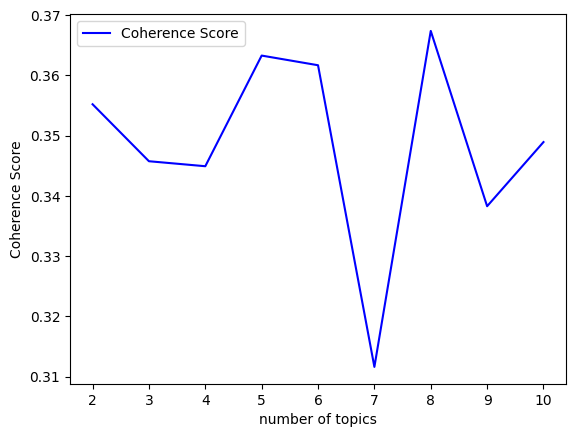

In [ ]:
plt.plot(x_values, y_values, 'b', label="Coherence Score")
plt.ylabel('Coherence Score')
plt.xlabel('number of topics')
plt.legend()
plt.show()

In [ ]:
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=8, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

In [ ]:
for idx in range(8):
    print("Topic #%s:" % idx, lda_model.print_topic(idx, 10))
print("=" * 200)

Topic #0: 0.033*"figure" + 0.023*"type" + 0.022*"body" + 0.020*"elastic" + 0.019*"slim" + 0.017*"suit" + 0.016*"straight" + 0.015*"waist" + 0.014*"stay" + 0.012*"armhole"
Topic #1: 0.133*"sweater" + 0.044*"legging" + 0.040*"jacket" + 0.025*"boot" + 0.022*"fall" + 0.020*"skinny" + 0.018*"winter" + 0.017*"soft" + 0.016*"heel" + 0.016*"cozy"
Topic #2: 0.053*"love" + 0.046*"great" + 0.025*"jean" + 0.025*"fit" + 0.024*"comfortable" + 0.024*"color" + 0.023*"perfect" + 0.020*"wear" + 0.020*"pant" + 0.019*"soft"
Topic #3: 0.140*"dress" + 0.024*"love" + 0.021*"beautiful" + 0.019*"wear" + 0.018*"perfect" + 0.011*"flattering" + 0.011*"gorgeous" + 0.009*"comfortable" + 0.009*"fit" + 0.009*"summer"
Topic #4: 0.224*"skirt" + 0.021*"poor" + 0.019*"classy" + 0.018*"tights" + 0.012*"ton" + 0.012*"terrible" + 0.011*"natural" + 0.011*"expensive" + 0.011*"barely" + 0.011*"crotch"
Topic #5: 0.039*"price" + 0.022*"worth" + 0.021*"disappointed" + 0.019*"coat" + 0.018*"wash" + 0.017*"belt" + 0.017*"quality" +

In [ ]:
# Compute Coherence Score & Perplexity
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)
print('Perplexity: ', lda_model.log_perplexity(corpus))

Coherence Score:  0.38489741921030474
Perplexity:  -7.2352064039128665


**Visualize topic models**

In [ ]:
!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 41.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 KB 31.3 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.1
    Uninstalling joblib-1.1.1:
      Successfully uninstalled joblib-1.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires joblib~=1.1.0, but you have joblib 1.2.0 which is incompatible.


In [ ]:
lda_viz = gensimvis.prepare(lda_model, corpus, id2word)
lda_viz

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.9/dist-packages/pyLDAvis/_prepare.py:243: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.224582 -0.066681       1        1  33.745575
7     -0.234520 -0.008654       2        1  23.047992
2     -0.230116  0.065078       3        1  15.342394
3     -0.171318  0.038352       4        1  14.259534
5      0.132294 -0.157070       5        1   4.504112
1      0.219531  0.344367       6        1   3.870806
0      0.229124 -0.197018       7        1   3.192143
4      0.279586 -0.018374       8        1   2.037445, topic_info=         Term          Freq         Total Category  logprob  loglift
6       dress  12476.000000  12476.000000  Default  30.0000  30.0000
86      skirt   2756.000000   2756.000000  Default  29.0000  29.0000
431   sweater   3262.000000   3262.000000  Default  28.0000  28.0000
49       love  10210.000000  10210.000000  Default  27.0000  27.0000
29       size   8890.000000   8890.000000  Default  26.0000  26.0000
...       ...           ...           ...      ...      ...      ...
1203  coverup     89.251077     90.147637   Topic8  -4.9450   3.8835
2625   nearly     87.594658     88.489146   Topic8  -4.9637   3.8833
937    beauty     86.040617     86.934998   Topic8  -4.9816   3.8831
196   pulling     85.176335     86.070870   Topic8  -4.9917   3.8830
3099     hate     80.979150     81.873679   Topic8  -5.0422   3.8825

[421 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
1114      1  0.996789        able
606       1  0.276493  absolutely
606       2  0.076136  absolutely
606       4  0.646486  absolutely
513       4  0.995366       added
...     ...       ...         ...
160       1  0.998288          xx
1399      2  0.996660      yellow
37        4  0.993100         zip
38        4  0.611708      zipper
38        7  0.386467      zipper

[559 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 8, 3, 4, 6, 2, 1, 5])

# LSA

In [ ]:
from gensim.models import LsiModel
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

lsamodel = LsiModel(corpus, num_topics=5, id2word = id2word) # train model


In [ ]:
for idx in range(5):
    print("Topic #%s:" % idx, lsamodel.print_topic(idx, 10))
print("=" * 200)

Topic #0: 0.392*"dress" + 0.282*"fit" + 0.263*"size" + 0.255*"love" + 0.240*"top" + 0.183*"like" + 0.180*"great" + 0.175*"color" + 0.175*"look" + 0.161*"wear"
Topic #1: -0.858*"dress" + 0.390*"top" + 0.095*"love" + 0.086*"color" + 0.079*"size" + 0.079*"shirt" + 0.075*"great" + 0.072*"like" + 0.072*"look" + 0.071*"jean"
Topic #2: 0.634*"top" + -0.574*"size" + -0.311*"fit" + 0.208*"dress" + 0.163*"love" + -0.127*"small" + -0.092*"ordered" + 0.089*"look" + -0.076*"petite" + -0.069*"run"
Topic #3: -0.586*"love" + 0.494*"top" + 0.358*"size" + -0.267*"great" + -0.190*"color" + 0.139*"small" + -0.130*"sweater" + 0.121*"dress" + -0.099*"jean" + -0.087*"soft"
Topic #4: 0.513*"love" + -0.455*"like" + -0.395*"look" + 0.322*"size" + 0.256*"top" + -0.131*"fabric" + -0.116*"really" + -0.112*"would" + -0.107*"sweater" + -0.105*"nice"


In [ ]:
from gensim.models import CoherenceModel

In [ ]:
def compute_coherence_values2(corpus, id2word, k):
   lsa_model = LsiModel(corpus=corpus, num_topics=k, id2word = id2word, chunksize = 100)
   coherence = CoherenceModel(model=lsa_model,
                              texts=data_words,
                              dictionary=id2word,
                              coherence='c_v')
   return coherence.get_coherence()


In [ ]:
coherenceList_lsa = []
numTopicsList = [2,3,4,5,6,7,8,9,10,11]

In [ ]:
for k in numTopicsList:
   co_lsa = compute_coherence_values2(corpus, id2word, k)
   coherenceList_lsa.append(co_lsa)

In [ ]:
coherenceList_lsa

[0.29529397828829984,
 0.3294176383261809,
 0.36558371087920727,
 0.3640474335269441,
 0.36999098448317497,
 0.3636141854869539,
 0.3598147601701287,
 0.36672894406117834,
 0.3591961858935667,
 0.3585564982612604]

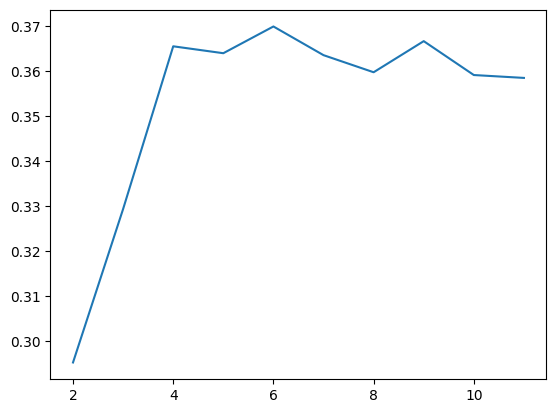

In [ ]:
plt.plot(numTopicsList, coherenceList_lsa, label="Coherence Score")

In [ ]:
from gensim.models import LsiModel
import gensim.corpora as corpora


# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

lsamodel = LsiModel(corpus, num_topics=6, id2word = id2word)  # train model


In [ ]:
for idx in range(6):
    print("Topic #%s:" % idx, lsamodel.print_topic(idx, 10))
print("=" * 200)

Topic #0: 0.392*"dress" + 0.282*"fit" + 0.263*"size" + 0.255*"love" + 0.240*"top" + 0.183*"like" + 0.180*"great" + 0.175*"color" + 0.175*"look" + 0.161*"wear"
Topic #1: 0.858*"dress" + -0.390*"top" + -0.095*"love" + -0.086*"color" + -0.079*"size" + -0.079*"shirt" + -0.075*"great" + -0.072*"like" + -0.072*"look" + -0.071*"jean"
Topic #2: 0.634*"top" + -0.574*"size" + -0.311*"fit" + 0.208*"dress" + 0.163*"love" + -0.127*"small" + -0.092*"ordered" + 0.089*"look" + -0.076*"petite" + -0.069*"run"
Topic #3: -0.586*"love" + 0.494*"top" + 0.358*"size" + -0.267*"great" + -0.190*"color" + 0.139*"small" + -0.130*"sweater" + 0.121*"dress" + -0.099*"jean" + -0.087*"soft"
Topic #4: -0.513*"love" + 0.454*"like" + 0.395*"look" + -0.322*"size" + -0.256*"top" + 0.131*"fabric" + 0.116*"really" + 0.112*"would" + 0.107*"sweater" + 0.105*"nice"
Topic #5: 0.695*"fit" + 0.415*"great" + -0.316*"love" + -0.273*"size" + -0.151*"like" + 0.126*"top" + -0.108*"run" + -0.100*"small" + -0.088*"look" + -0.087*"would"


In [ ]:
# Compute Coherence Score & Perplexity
coherence_model_lsa = CoherenceModel(model=lsamodel, texts=data_words, dictionary=id2word, coherence='c_v')
coherence_lsa = coherence_model_lsa.get_coherence()
print('Coherence Score: ', coherence_lsa)

Coherence Score:  0.37015535025505947


#LSA Part 2

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', 
max_df = 0.5, 
smooth_idf=True)

X = vectorizer.fit_transform(df['Text'].astype('string'))

X.shape

(19661, 16349)

In [ ]:
from sklearn.decomposition import TruncatedSVD

svd_model = TruncatedSVD(n_components=20, algorithm='randomized', n_iter=100, random_state=12345)

svd_model.fit(X)

len(svd_model.components_)

20

In [ ]:
terms = vectorizer.get_feature_names_out()

for i, comp in enumerate(svd_model.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i)+": ")
    for t in sorted_terms:
        print(t[0])
        print(" ")

Topic 0: 
dress
 
love
 
fit
 
size
 
great
 
color
 
wear
 
look
 
like
 
small
 
Topic 1: 
dress
 
beautiful
 
slip
 
wedding
 
gorgeous
 
knee
 
bust
 
petite
 
summer
 
flattering
 
Topic 2: 
great
 
love
 
comfortable
 
jean
 
perfect
 
dress
 
soft
 
color
 
pant
 
comfy
 
Topic 3: 
size
 
small
 
run
 
pant
 
great
 
jean
 
perfect
 
fit
 
large
 
love
 
Topic 4: 
sweater
 
beautiful
 
love
 
size
 
color
 
perfect
 
gorgeous
 
small
 
fit
 
medium
 
Topic 5: 
sweater
 
cute
 
shirt
 
love
 
run
 
small
 
large
 
super
 
medium
 
wear
 
Topic 6: 
shirt
 
love
 
beautiful
 
color
 
blouse
 
fabric
 
gorgeous
 
bought
 
size
 
flattering
 
Topic 7: 
great
 
shirt
 
sweater
 
small
 
run
 
large
 
look
 
nice
 
fall
 
dress
 
Topic 8: 
skirt
 
cute
 
beautiful
 
run
 
color
 
love
 
fabric
 
waist
 
really
 
super
 
Topic 9: 
perfect
 
size
 
fit
 
shirt
 
cute
 
true
 
sweater
 
petite
 
soft
 
flattering
 
Topic 10: 
color
 
great
 
pant
 
cute
 
fit
 
fabric
 
soft
 
nice
 
size

Topic 0: 
dress
 
love
 
fit
 
size
 
great
 
color
 
wear
 
look
 
like
 
small
 
Topic 1: 
dress
 
beautiful
 
slip
 
wedding
 
gorgeous
 
knee
 
bust
 
petite
 
summer
 
flattering
 
Topic 2: 
great
 
love
 
comfortable
 
jean
 
perfect
 
dress
 
soft
 
color
 
pant
 
comfy
 
Topic 3: 
size
 
small
 
run
 
pant
 
great
 
jean
 
perfect
 
fit
 
large
 
love
 
Topic 4: 
sweater
 
beautiful
 
love
 
size
 
color
 
perfect
 
gorgeous
 
small
 
fit
 
medium
 
Topic 5: 
sweater
 
cute
 
shirt
 
love
 
run
 
small
 
large
 
super
 
medium
 
wear
 
Topic 6: 
shirt
 
love
 
beautiful
 
color
 
blouse
 
fabric
 
gorgeous
 
bought
 
size
 
flattering
 
Topic 7: 
great
 
shirt
 
sweater
 
small
 
run
 
large
 
look
 
nice
 
fall
 
dress
 
Topic 8: 
skirt
 
cute
 
beautiful
 
run
 
color
 
love
 
fabric
 
waist
 
really
 
super
 
Topic 9: 
perfect
 
size
 
fit
 
shirt
 
cute
 
true
 
sweater
 
petite
 
soft
 
flattering
 
Topic 10: 
color
 
great
 
pant
 
cute
 
fit
 
fabric
 
soft
 
nice
 
size
 
true
 
Topic 11: 
love
 
great
 
short
 
fit
 
petite
 
sweater
 
length
 
cute
 
long
 
ordered
 
Topic 12: 
jean
 
size
 
beautiful
 
cute
 
true
 
look
 
fit
 
skinny
 
blouse
 
sweater
 
Topic 13: 
pant
 
shirt
 
sweater
 
comfortable
 
skirt
 
size
 
dress
 
run
 
waist
 
soft
 
Topic 14: 
soft
 
comfortable
 
flattering
 
fit
 
fabric
 
super
 
size
 
material
 
nice
 
like
 
Topic 15: 
short
 
jean
 
run
 
large
 
beautiful
 
pretty
 
soft
 
nice
 
long
 
length
 
Topic 16: 
beautiful
 
small
 
fit
 
flattering
 
medium
 
super
 
pant
 
comfortable
 
perfectly
 
short
 
Topic 17: 
perfect
 
fit
 
blouse
 
summer
 
fabric
 
quality
 
pant
 
love
 
nice
 
sweater
 
Topic 18: 
pretty
 
blouse
 
wear
 
short
 
size
 
great
 
compliment
 
work
 
flattering
 
comfortable
 
Topic 19: 
color
 
pretty
 
fit
 
nice
 
jean
 
sweater
 
small
 
dress
 
shirt
 
really

In [ ]:
print(df['Class_Name'].value_counts())

Dresses           5371
Knits             3981
Blouses           2587
Sweaters          1218
Pants             1157
Jeans              970
Fine gauge         927
Skirts             796
Jackets            598
Lounge             574
Swim               292
Outerwear          281
Shorts             260
Sleep              174
Legwear            131
Intimates          120
Layering           115
Trend              107
Casual bottoms       1
Chemises             1
Name: Class_Name, dtype: int64


In [ ]:
df['Class_Name'].replace(['Dresses', 'Knits', 'Blouses', 'Sweaters', 'Pants', 'Jeans', 'Fine gauge', 'Skirts', 'Jackets', 'Lounge', 'Swim', 'Outerwear', 'Shorts', 'Sleep', 'Legwear', 'Intimates', 'Layering', 'Trend', 'Casual bottoms', 'Chemises'], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], inplace=True)

In [ ]:
df['Class_Name'].astype('Int32')

2        0
3        4
4        2
5        0
6        1
        ..
23481    0
23482    1
23483    0
23484    0
23485    0
Name: Class_Name, Length: 19661, dtype: Int32

In [ ]:
!pip install umap-learn
import umap.umap_ as umap

X_topics = svd_model.fit_transform(X)
embedding = umap.UMAP(n_neighbors=150, min_dist=0.5, random_state=12345).fit_transform(X_topics)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


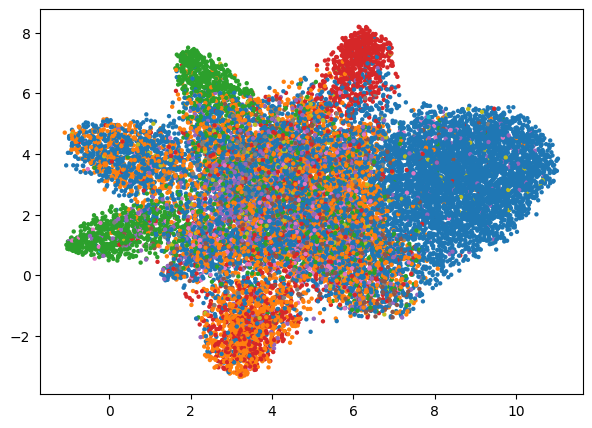

In [ ]:
plt.figure(figsize=(7,5))


plt.scatter(embedding[:, 0], embedding[:, 1], 
s = 10, # size
c = [df['Class_Name']],
edgecolor='none', 
cmap = "tab10"
)
plt.show()

In [ ]:
X_topics = svd_model.fit_transform(X)
embedding = umap.UMAP(n_neighbors=150, min_dist=0.5, random_state=12345, n_components=3).fit_transform(X_topics)

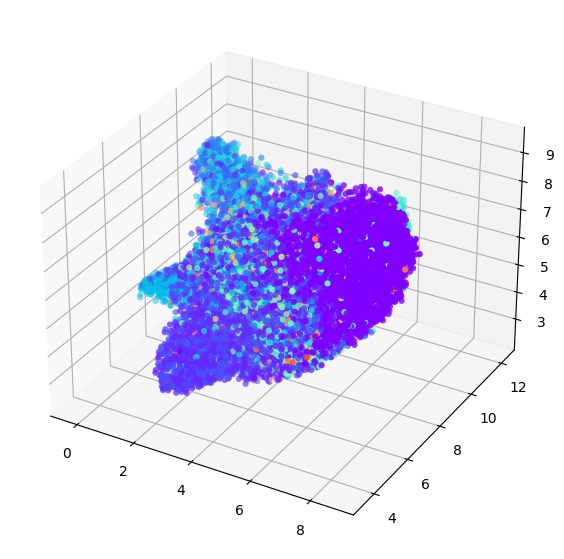

In [ ]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

ax.scatter3D(embedding[:, 0], embedding[:, 1], embedding[:, 2],
c = [df['Class_Name']],
edgecolor='none', 
cmap = "rainbow"
)
plt.show()

In [ ]:
DF = pd.DataFrame(X_topics)
DF.to_csv("data1.csv")

Some snippets and inspiration from here: https://www.analyticsvidhya.com/blog/2018/10/stepwise-guide-topic-modeling-latent-semantic-analysis/